<a href="https://colab.research.google.com/github/GenaroHacker/creating_chord_collection/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
#@title Set Up
!git clone https://github.com/GenaroHacker/write_imports.git
from write_imports.write_imports import write_imports

!git clone https://github.com/GenaroHacker/creating_chord_collection.git


from creating_chord_collection.collection.resources.scales import scales
from creating_chord_collection.collection.resources.transposable_figures import transposable_figures



In [2]:



# Delete this line to see the new imports
%%capture



#@title Import Statements
#Modules: ['write_imports', 'creating_chord_collection']



from write_imports.write_imports import write_imports

from write_imports.LearningPython.BasicExamples.intro_functions import print_hello_world


from creating_chord_collection.collection.chord import GuitarChord

from creating_chord_collection.collection.collection import ChordCollection







print(write_imports([]))






In [3]:
# @title Chord


# Example
chord = GuitarChord('E', 'm', transposable_figures, finger_ascending=[0, 0, 0, 2, 2, 0], starting_fret=1)
print(chord)
print("String Frequencies:", chord.calculate_frequencies())
print("Is Open Chord:", chord.is_open())
chord.transpose(0)
print(chord.get_notes(include_strings=True))
print(chord.get_notes())

# Validate the chord against the C major scale
ionian_scale = scales["ionian"]
tonic = "C"
is_chord_in_scale = chord.validate_against_scale(tonic, ionian_scale)
print(f"Chord fits in C major scale: {is_chord_in_scale}")


('E', 'm', finger_ascending=[0, 0, 0, 2, 2, 0], starting_fret=1)
String Frequencies: {1: 329.63, 2: 246.94, 3: 196.0, 4: 164.81110255326524, 5: 123.47082531403103, 6: 82.41}
Is Open Chord: True
{1: 'E', 2: 'B', 3: 'G', 4: 'E', 5: 'B', 6: 'E'}
['E', 'B', 'G']
Chord fits in C major scale: True


In [15]:
# @title Abstract Builders
class AbstractBuilder:
    def __init__(self):
        self.image_size = (1, 1)
        self.frets_endpoints = {}
        self.strings_endpoints = {}
        self.notes_coordenates = None
        self.name_coordenate = (1, 1)
        self.font = "arial"
        self.font_size = 12

        self.root = None
        self.starting_fret = None

        self.chord_type = None
        self.finger_ascending = None

        self.scale_name = None
        self.scale = None



    def draw_boundaries(self):
        # Create an image with a white background
        self.image = Image.new('RGB', self.image_size, 'white')
        self.draw = ImageDraw.Draw(self.image)

    def draw_frets(self):
        # Draw frets lines
        for y in self.frets_endpoints['y']:
            self.draw.line((self.frets_endpoints['x'][0], y, self.frets_endpoints['x'][1], y), fill='black')

    def draw_strings(self):
        # Draw strings lines
        for x in self.strings_endpoints['x']:
            self.draw.line((x, self.strings_endpoints['y'][0], x, self.strings_endpoints['y'][1]), fill='black')

    def write_starting_fret(self):
        raise NotImplementedError

    def write_name(self, name):
        # Write the name on the image
        try:
            font = ImageFont.truetype(self.font, self.font_size)
        except IOError:
            font = ImageFont.load_default()
        self.draw.text(self.name_coordenate, name, fill='black', font=font)

    def draw_notes(self, notes_style):
        raise NotImplementedError

    def get_result(self):
        return self.image

class ShortAbstractBuilder(AbstractBuilder):
    def __init__(self):
        self.image_size = (351, 351)

        # Frets endpoints as a dictionary with unique x and y coordinates
        self.frets_endpoints = {
            "x": [78, 273],  # x-coordinates (start and end for all frets)
            "y": [107, 157, 207, 257, 307]  # y-coordinates for each fret
        }

        # Strings endpoints as a dictionary with unique x and y coordinates
        self.strings_endpoints = {
            "x": [78, 117, 156, 195, 234, 273],  # x-coordinates for each string
            "y": [107, 307]  # y-coordinates (start and end for all strings)
        }

        self.notes_coordenates = {
            "strings": [273, 234, 195, 156, 117, 78],  # s1 to s6
            "frets": [82, 132, 182, 232, 282]  # f0 to f4
        }

        self.name_coordenate = (175, 40)




class LongAbstractBuilder(AbstractBuilder):
    def __init__(self):
        # Updated image size with additional height
        self.image_size = (717, 362)

        # Updated y-coordinates in frets_endpoints
        self.frets_endpoints = {
            "x": [67, 117, 167, 217, 267, 317, 367, 417, 467, 517, 567, 617, 667],
            "y": [277, 238, 199, 160, 121, 82]
        }

        # Updated y-coordinates in strings_endpoints
        self.strings_endpoints = {
            "x": [67, 667],
            "y": [82, 121, 160, 199, 238, 277]
        }

        # Updated y-coordinates in notes_coordenates for strings
        self.notes_coordenates = {
            "strings": [82, 121, 160, 199, 238, 277], # y-coordinates for strings
            "frets": [42, 92, 142, 192, 242, 292, 342, 392, 442, 492, 542, 592, 642]  # x-coordinates for frets
        }

        self.name_coordenate = (358, 40)




In [10]:
# @title Concrete Builders
class ShortChordBuilder(ShortAbstractBuilder):
    def __init__(self):
        super().__init__()
        self.is_scale = False
        # Implement specific methods

class ShortScaleBuilder(ShortAbstractBuilder):
    def __init__(self):
        super().__init__()
        self.is_scale = True
        # Implement specific methods

class LongChordBuilder(LongAbstractBuilder):
    def __init__(self):
        super().__init__()
        self.is_scale = False
        # Implement specific methods

class LongScaleBuilder(LongAbstractBuilder):
    def __init__(self):
        super().__init__()
        self.is_scale = True
        # Implement specific methods


In [11]:
# @title Director
class Director:
    def __init__(self, builder):
        self._builder = builder

    def build_chord(self, chord):
        self._builder.draw_boundaries()
        self._builder.root = chord.root
        self._builder.chord_type = chord.chord_type
        self._builder.finger_ascending = chord.finger_ascending
        self._builder.starting_fret = chord.starting_fret
        self._builder.draw_boundaries()

    def build_scale(self, scale):
        self._builder.draw_boundaries()
        self._builder.root = scale.root
        self._builder.scale_name = scale.name
        self._builder.starting_fret = scale.starting_fret
        self._builder.scale = scale


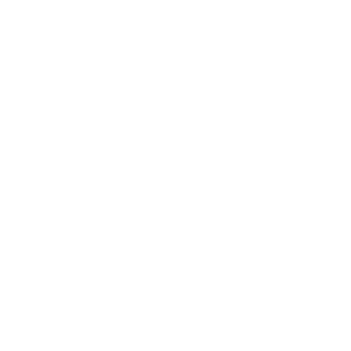

In [16]:
# @title Execution
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display

# Example usage for a chord
chord = GuitarChord('E', 'm', transposable_figures, finger_ascending=[0, 0, 0, 2, 2, 0], starting_fret=1)
builder = ShortChordBuilder()
director = Director(builder)
director.build_chord(chord)

# Get the final image result
result_image = builder.get_result()

# Display the image in the Jupyter notebook
display(result_image)
